<a href="https://colab.research.google.com/github/albertofernandezvillan/dl-ml-notebooks/blob/main/DeepLearningIntroduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Import required packages:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [9]:
# Tensorflow 2.4.0 version was used en running this notebook
print(tf.__version__)

2.4.0


In [2]:
### 1) First point is to define the data:
# Number of points:
N = 50
# Make random numbers predictable:
np.random.seed(101)
# Generate random data composed by 50 (N = 50) points:
x = np.linspace(0, N, N)
y = 3 * np.linspace(0, N, N) + np.random.uniform(-10, 10, N)

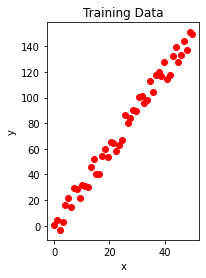

In [3]:
### 2) Plot the training data:
# Plot training data:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'ro', label='Original data')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
# Show the Figure:
plt.show()

In [75]:
def create_model():
    """Create the model using Sequential model"""

    # Create a sequential model:
    model = tf.keras.Sequential()
    model.add(keras.layers.Dense(2, input_dim=1))
    model.add(keras.layers.Dense(1))

    # Compile the model defining mean squared error(mse) as the loss (loss='mean_squared_error' can also be written)
    model.compile(optimizer=keras.optimizers.Adam(lr=0.1), loss='mse')

    # Return the created model
    return model

In [76]:
# Get the created model:
linear_reg_model = create_model()
print(linear_reg_model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
None


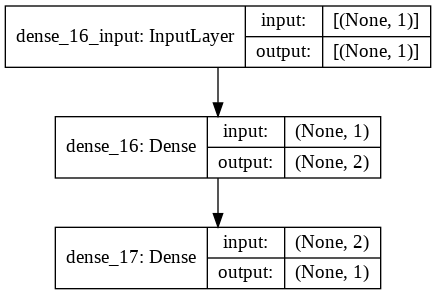

In [77]:
# For more info: "https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/"
plot_model(linear_reg_model, to_file='linear_reg_model_plot.png', show_shapes=True, show_layer_names=True)

In [78]:
history = linear_reg_model.fit(x, y, epochs=50, validation_split=0.2, verbose=0)

In [60]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


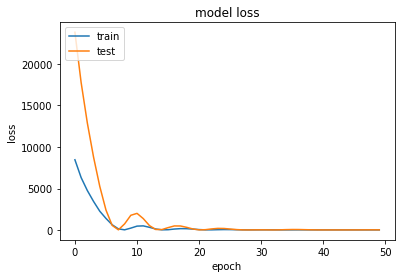

In [79]:
# summarize history for loss
# For more info: "https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [81]:
# We can use model.predict() to predict the value for a new value:
print(linear_reg_model.predict([100.0]))

[[300.82242]]


In [85]:
### Saving the model
# For more info see: "https://www.tensorflow.org/guide/keras/save_and_serialize"
# The recommended format is the following:
# Calling `save(/content/linear_reg_model)` creates a SavedModel folder '/content/linear_reg_model'.
linear_reg_model.save('/content/linear_reg_model')

INFO:tensorflow:Assets written to: /content/linear_reg_model/assets


In [89]:
# The model architecture, and training configuration (including the optimizer, losses, and metrics) 
# are stored in saved_model.pb. The weights are saved in the variables/ directory.
!ls /content/linear_reg_model

assets	saved_model.pb	variables


In [88]:
# You can also save the model using the older Keras H5 format
# Keras also supports saving a single HDF5 file containing the model's architecture, 
# weights values, and compile() information. It is a light-weight alternative to SavedModel.
linear_reg_model.save('/content/linear_reg_model.h5') 

In [118]:
### Load the trained model and make predictions:
reconstructed_model = keras.models.load_model('/content/linear_reg_model.h5')
# Let's check:
test_input = np.random.uniform(50, 80, 4)
np.testing.assert_allclose(
    reconstructed_model.predict(test_input), reconstructed_model.predict(test_input))

# The reconstructed model is already compiled and has retained the optimizer
# state, so training could be resumed in case of need

In [ ]:
# We can use the reconstructed model for predicting a new value:
reconstructed_model.predict([100.0])

In [92]:
reconstructed_model_2 = keras.models.load_model('/content/linear_reg_model')
reconstructed_model_2.predict([100.0])

array([[300.82242]], dtype=float32)

In [115]:
test_input = np.random.uniform(50, 80, 4)
test_input

array([64.90599559, 79.26083381, 56.10582862, 58.97061229])

In [116]:
predictions = reconstructed_model_2.predict(test_input)
predictions

array([[195.92386],
       [238.83153],
       [169.61949],
       [178.18256]], dtype=float32)